[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/florpi/from-zero-to-generative/blob/main/2-generative.ipynb)

In [1]:
!pip install jax jaxlib flax torchvision torch numpy matplotlib optax equinox diffrax

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 80.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 64.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 49.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [2]:
# as opposed to pytorch, jax handles device placement automatically
# Now let's check wehther you are actually using a gpu,
# if so, the output should be a cuda id, otherwise you are using a cpu

# For this tutorial, the gpu will be needed (for the training of the last section)
import jax
print(jax.devices())

[CudaDevice(id=0)]


In [3]:
import torchvision
import torchvision.transforms as transforms
import numpy as np
import jax.numpy as jnp
from torch.utils.data import DataLoader

# These transformations are applied to the data as it is loaded, do not worry too much about them,
# but I leave some explanations on why they are there for you to understand in case you are curious / confused

transform = transforms.Compose(
    (
        transforms.ToTensor(), # This will transform the original data format of the images into pytorch tensors,
        # so that we can use the Normalize transform on them
        transforms.Normalize((0.5,), (0.5,)), # The images are originally scaled between 0 and 1,
        # but generative models would usually standarize them to have 0 mean and 1 std
        transforms.Lambda(lambda x: np.transpose(np.array(x), (1,2,0))), # we will convert pytorch tensors into jax obejects.
        # An odd distinction between jax and pytorch is how they assume image data is formatted.
        # # For pytorch an image has shape (n_channels, n_pixels, n_pixels),
        #  whereas for jax it should be (n_pixels, n_pixels, n_channels), hence the transpose...
    )
)
# Now we will create a dataset that can download and obtain the data we want
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

train_loader = iter(train_dataloader)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9.91M/9.91M [00:00<00:00, 13.1MB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 28.9k/28.9k [00:00<00:00, 346kB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.65M/1.65M [00:00<00:00, 3.28MB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.54k/4.54k [00:00<00:00, 7.08MB/s]


# üé® From Classification to Generation: Flow Matching

We've mastered classifying digits, but now it's time to flip the script. Instead of recognizing numbers, we're going to create them.

### üåä Flow Matching

We're going to learn a process that gradually transforms random noise into digit images. Let's break down the key equations:

1. **Velocity Ordinary Differential Equation (ODE)**:
   At the heart of Flow Matching is this equation:

   $\frac{dx_t}{dt} = v_\theta(x_t, t)$

   Where:
   - $x_t$ is our image as it's being transformed
   - $t$ is time (0 to 1)
   - $v_\theta$ is a velocity field we'll learn (it will be the output of our model)

2. **Linear Interpolation**:
   We chose an x_t that obeys:

   $x_t = (1-t)x_0 + tx_1$

   Where:
   - $x_0$ is random noise (our starting point)
   - $x_1$ is a real digit image (our target)

3. **Loss Function**:
   We train our model to minimize:

   $L = \mathbb{E}_{t,x_0,x_1} \left[ \left\| v_\theta(x_t, t) - u(x_0,x_1,t) \right\|^2 \right]$

   Where, given the linear interpolant, the true velocity field is $u(x_0, x_1,t) = x_1 - x_0$, This teaches our model to predict the right direction of change at each step.


We'll create a neural network that learns this vector field v. Once trained, we can use it to generate new MNIST-like digits by:
1. Starting with random noise
2. Following the learned flow to transform the noise into a digit by solving the ODE


In [4]:
import flax.linen as nn
import jax.numpy as jnp

class VelocityModel(nn.Module):
    backbone: nn.Module
    d_t_embedding: int = 32

    @nn.compact
    def __call__(self, x_t, t,):
        t_embedding = self.get_timestep_embedding(
            t, self.d_t_embedding
        )
        # return the value of the velocity field for x_t at time t
        return self.backbone(x_t, t_embedding,)

    def get_timestep_embedding(self, time, embedding_dim: int, dtype=jnp.float32):
        """Time is embedded into a continuous space using sinusoidal functions. This function will
        take a value for time and return a vector of size `embedding_dim` that represents that time.

        """
        assert len(time.shape) == 1
        time *= 1000

        half_dim = embedding_dim // 2
        emb = jnp.log(10_000) / (half_dim - 1)
        emb = jnp.exp(jnp.arange(half_dim, dtype=dtype) * -emb)
        emb = time.astype(dtype)[:, None] * emb[None, :]
        emb = jnp.concatenate([jnp.sin(emb), jnp.cos(emb)], axis=1)
        if embedding_dim % 2 == 1:  # Zero pad
            emb = jax.lax.pad(emb, dtype(0), ((0, 0, 0), (0, 1, 0)))
        assert emb.shape == (time.shape[0], embedding_dim)
        return emb.squeeze()


Let's modify the MLP used before, since now we will need to output an array of the same shape as our input for the velocity field. In this case, it will be (28,28,1)

In [6]:
import numpy as np

class MLP(nn.Module):
    input_shape: tuple  # The shape of the input images

    @nn.compact
    def __call__(self, x, t):
        batch_size = x.shape[0]
        x = x.reshape((batch_size, -1))  # Flatten the input
        x = jnp.concatenate([x, t], axis=-1)
        #TODO: write an architecture that returns an image of the same shape as the input
        x = nn.Dense(features=1024)(x)
        x = nn.silu(x)
        x = nn.Dense(features=1024)(x)
        x = nn.silu(x)
        x = nn.Dense(features=1024)(x)
        x = nn.silu(x)
        x = nn.Dense(features=1024)(x)
        x = nn.silu(x)
        x = nn.Dense(features=np.prod(self.input_shape))(x)
        x = x.reshape((batch_size, *self.input_shape))  # Reshape back to the original image shape
        return x

In [7]:
# Let's now initialize the model
backbone = MLP(input_shape=(28, 28,1))
velocity_model = VelocityModel(
    backbone=backbone,
    d_t_embedding=64,
)

In [10]:
# Let's check that input and output indeed have the same shape
key = jax.random.PRNGKey(0)
out, params = velocity_model.init_with_output(
    key,
    jnp.ones((batch_size,28,28,1)),
    jnp.array([0.1]*batch_size),
)

# TODO: Initialize the model and check output and input shapes are the same
assert out.shape == (batch_size, 28, 28, 1)
print(out.shape)


(64, 28, 28, 1)


In [11]:
import optax
# and let's initialize the optimiser again
learning_rate = 1.e-3
optimizer = optax.adam(learning_rate)
opt_state = optimizer.init(params)

In [12]:
# Now let's go back to the flow matching example
# we will first generate samples from xt and plot the trajectories
import equinox as eqx

def pad_t_like_x(t, x):
    # since t is a scalar, we need to pad it to have the same shape as x
    if isinstance(t, (float, int)):
        return t
    return jnp.reshape(t, (-1, *([1] * (x.ndim - 1))))

def sample_xt(x0, x1, t):
    t = pad_t_like_x(t, x0)
    # TODO: write down the equation for xt as a function of time
    xt = (1 - t) * x0 + t * x1
    return xt

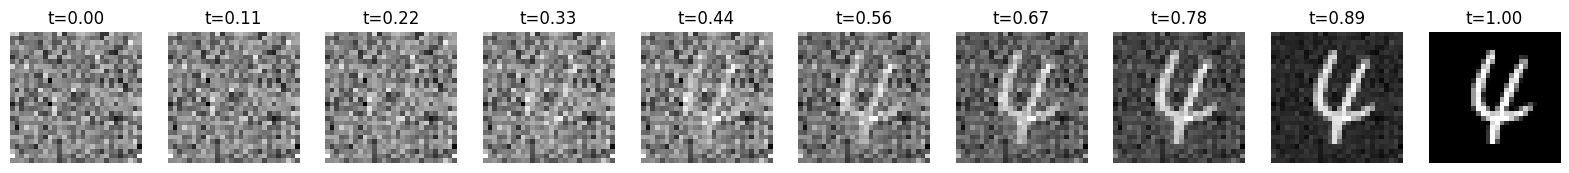

In [14]:
# Now we will plot the trajectories xt for one particular example, starting from random noise
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_loader)
x_batch = jnp.array(x_batch)

t = jnp.linspace(0, 1, 10)

x1 = x_batch[3]
#TODO: Get trajectories at different times t for the single example x1

x0 = jax.random.normal(key, x_batch[0].shape)
xt = jnp.stack([sample_xt(x0, x1, t_) for t_ in t])

fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axs):
    ax.imshow(xt[i][:,:,0], cmap='gray')
    ax.axis('off')
    ax.set_title(f't={t[i]:.2f}')

In [ ]:
# Now let's compute the loss function

def loss_fn(params, x0, x1, t, velocity_model):
    xt = sample_xt(x0, x1, t)
    vt = velocity_model.apply(params, xt, t,)
    #TODO: Write loss function
    loss =
    return loss



In [ ]:
# and define the training step again
@eqx.filter_jit
def train_step(params, opt_state, x0, x, t_batch, velocity_model, optimizer):
    loss, grads = jax.value_and_grad(loss_fn)(params, x0, x, t_batch,  velocity_model)
    updates, opt_state = optimizer.update(grads, opt_state, params)
    params = optax.apply_updates(params, updates)
    return params, opt_state, loss

In [ ]:

import diffrax as dfx

# This sample function will solve the ODE from 0 to 1, to get new generated samples
@eqx.filter_jit
def sample(params, velocity_model, x0, dt:float= 0.01,):
    original_shape = x0.shape
    def velocity(t, x, args):
        x = x.reshape(original_shape)
        t = jnp.atleast_1d(t)
        t = jnp.repeat(t, original_shape[0])
        return velocity_model.apply(params, x, t,).reshape(-1)
    term = dfx.ODETerm(velocity)
    solver = dfx.Euler()
    sol = dfx.diffeqsolve(term, solver, 0., 1., dt, x0.reshape(-1))
    (y,) = sol.ys
    return y.reshape(original_shape)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/equinox/_ad.py:733: UserWarning: As of Equinox 0.10.7, `equinox.filter_custom_vjp.defvjp` is deprecated in favour of `.def_fwd` and `.def_bwd`. This new API supports symbolic zeros, which allow for more efficient autodifferentiation rules. In particular:
- the fwd and bwd functions take an extra `perturbed` argument, which     indicates which primals actually need a gradient. You can use this     to skip computing the gradient for any unperturbed value. (You can     also safely just ignore this if you wish.)
- `None` was previously passed to indicate a symbolic zero gradient for     all objects that weren't inexact arrays, but all inexact arrays     always had an array-valued gradient. Now, `None` may also be passed     to indicate that an inexact array has a symbolic zero gradient.
  warnings.warn(


In [ ]:
# this function will help us plot generated samples as we train the model, to check that the model is learning

def plot_image_grid(images, grid_size=(8, 8), figsize=(10, 10), suptitle=None):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(images):
            ax.imshow(images[i][:,:,0], cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')
    if suptitle is not None:
        fig.suptitle(suptitle)
    plt.tight_layout()
    plt.show()

Training:   0%|          | 0/6000 [00:00<?, ?step/s]

Training:   0%|          | 1/6000 [00:00<1:15:16,  1.33step/s, loss=1.9494429]

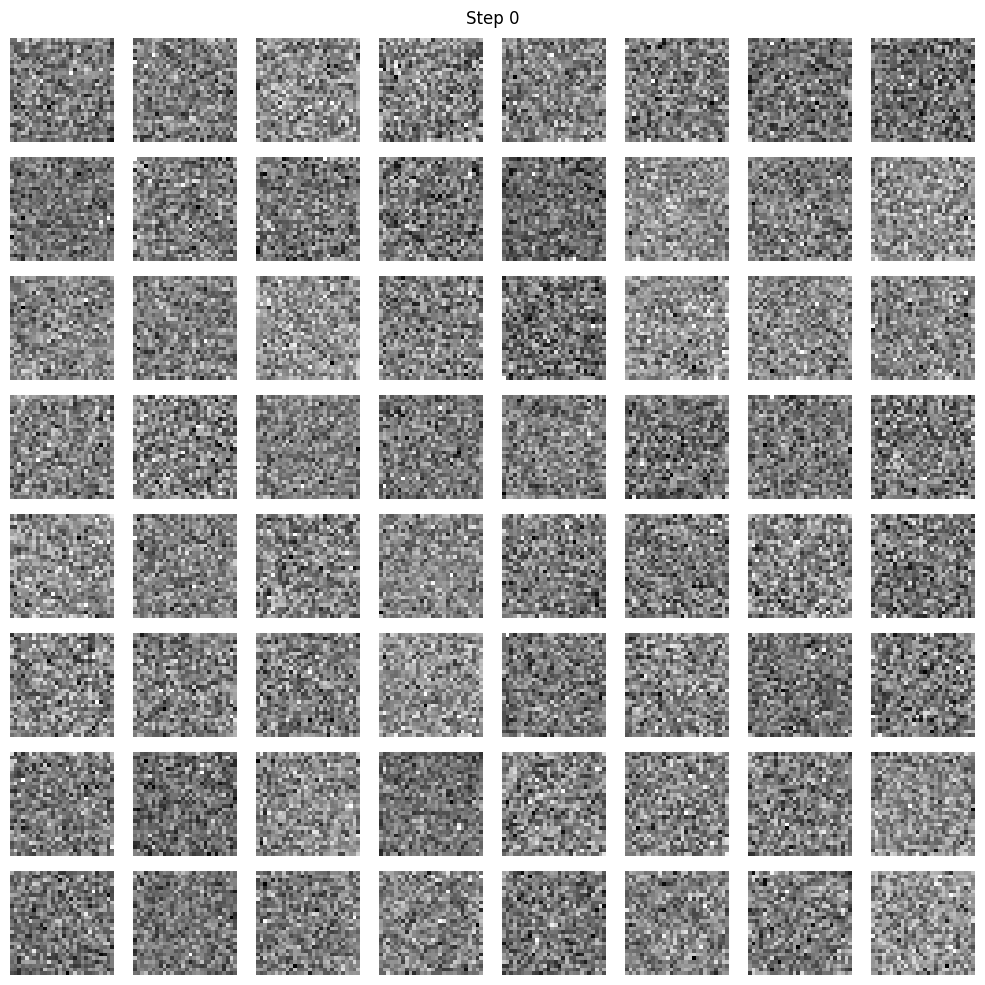

Training:  12%|‚ñà‚ñè        | 692/6000 [00:28<03:23, 26.08step/s, loss=1.0100517] 

In [ ]:
# and now let's train the model !

from tqdm import tqdm

num_steps = 6_000
fcn_train_loss = []
with tqdm(total=num_steps, desc='Training', unit='step') as pbar:
    for step in range(num_steps):
        key, subkey1, subkey2 = jax.random.split(key, 3)
        try:
            images, labels = next(train_loader)
        except StopIteration:
            train_loader = iter(train_dataloader)
            images, labels = next(train_loader)
        images, labels = jnp.array(images), jnp.array(labels)
        t_batch = jax.random.uniform(subkey1, (len(images),))
        x0 = jax.random.normal(subkey2, images.shape)
        params, opt_state, loss = train_step(params, opt_state, x0, images, t_batch, velocity_model, optimizer)
        fcn_train_loss.append(loss)
        pbar.set_postfix(loss=loss)
        pbar.update(1)
        if step % 1_000 == 0:
            x1 = sample(params, velocity_model, x0[:64], dt=0.01)
            plot_image_grid(x1, suptitle=f'Step {step}')

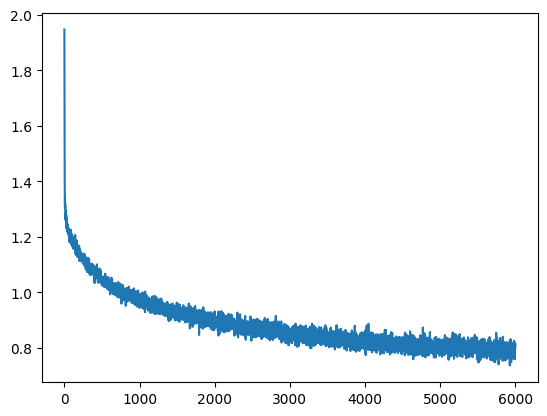

In [ ]:
# and plot the loss function
plt.plot(fcn_train_loss)

As you can see the loss goes down, but the generated samples don't look great. They are very noisy!

If you remember the lectures, we talked about how inductive biases can help us learn in cases were the dimensionality of the problem is high. Here, we have 28^2 dimensional images, so convolutional networks could help us learn a better velocity field. Let's try it!

In [ ]:


from flax.linen import Conv, ConvTranspose

class ConvBlock(nn.Module):
    features: int

    @nn.compact
    def __call__(self, x):
        x = Conv(features=self.features, kernel_size=(3, 3), padding='SAME')(x)
        x = nn.silu(x)
        x = Conv(features=self.features, kernel_size=(3, 3), padding='SAME')(x)
        x = nn.silu(x)
        return x

class UNet(nn.Module):
    @nn.compact
    def __call__(self, x, t):
        # Downsampling path
        c1 = ConvBlock(features=32)(x)
        c1 = x + t[:,None,None,]
        p1 = nn.max_pool(c1, (2, 2), strides=(2, 2), padding='SAME')

        c2 = ConvBlock(features=64)(p1)
        p2 = nn.max_pool(c2, (2, 2), strides=(2, 2), padding='SAME')

        b = ConvBlock(features=64)(p2)
        # Upsampling path

        u2 = ConvTranspose(features=64, kernel_size=(2, 2), strides=(2, 2))(b)
        u2 = jnp.concatenate([u2, c2], axis=-1)
        u2 = ConvBlock(features=64)(u2)

        u1 = ConvTranspose(features=64, kernel_size=(2, 2), strides=(2, 2))(u2)
        u1 = jnp.concatenate([u1, c1], axis=-1)
        u1 = ConvBlock(features=64)(u1)

        # Output layer
        outputs = Conv(features=1, kernel_size=(1, 1))(u1)

        return outputs



In [ ]:
backbone = UNet()
velocity_model = VelocityModel(
    backbone=backbone,
    d_t_embedding=64,
)
# explain randomness and keys

key = jax.random.PRNGKey(0)
out, params = velocity_model.init_with_output(
    key,
    jnp.array(x_batch),
    jnp.array([0.1]*batch_size),
)
learning_rate = 1.e-3
optimizer = optax.adam(learning_rate)
opt_state = optimizer.init(params)

Training:   0%|          | 1/6000 [00:04<6:47:01,  4.07s/step, loss=1.8185188]

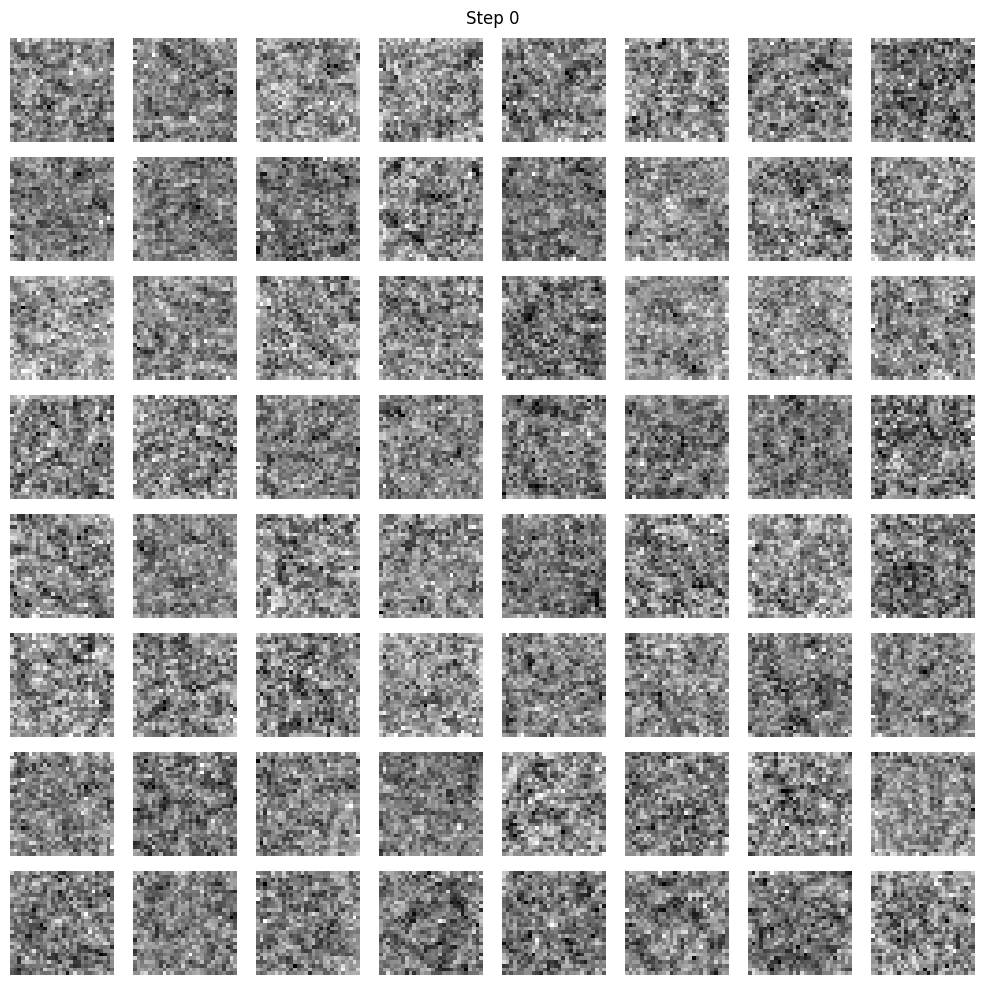

Training:  17%|‚ñà‚ñã        | 1000/6000 [00:30<01:55, 43.32step/s, loss=0.24292794]

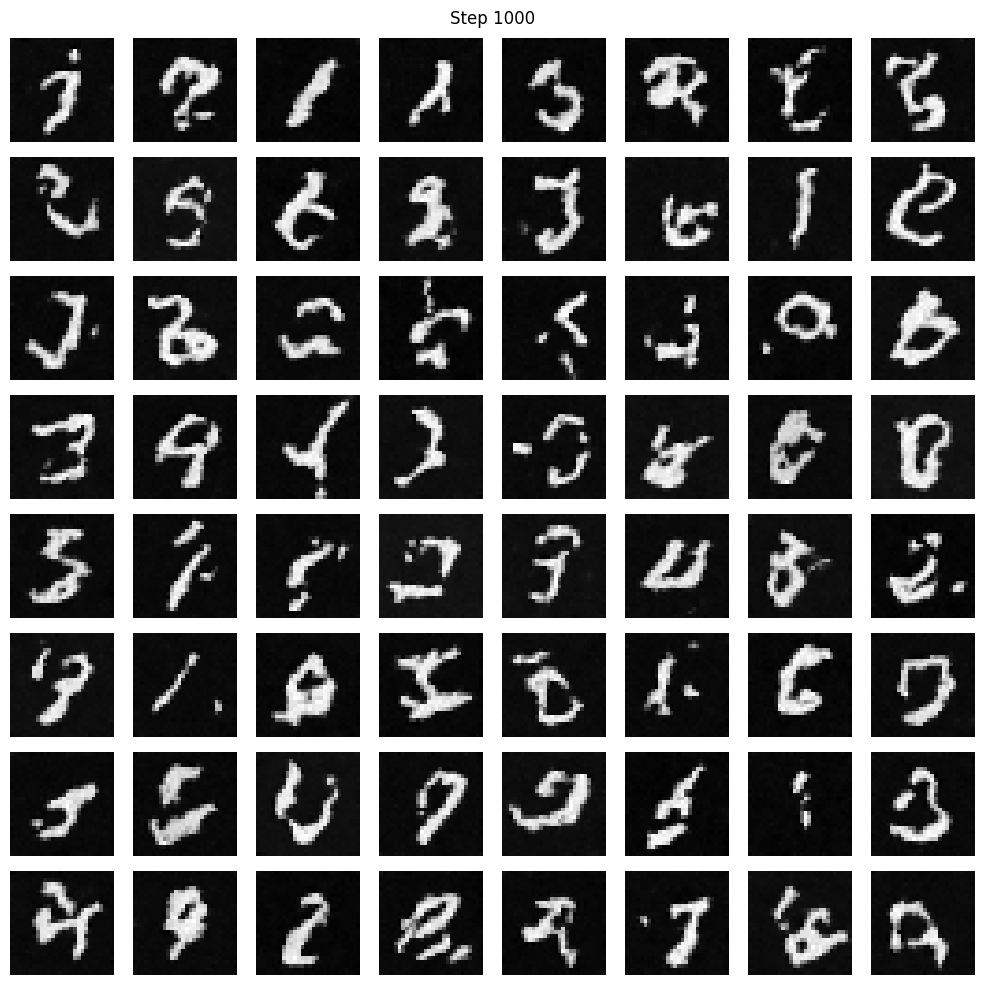

Training:  33%|‚ñà‚ñà‚ñà‚ñé      | 2000/6000 [00:55<01:37, 41.16step/s, loss=0.21582113]

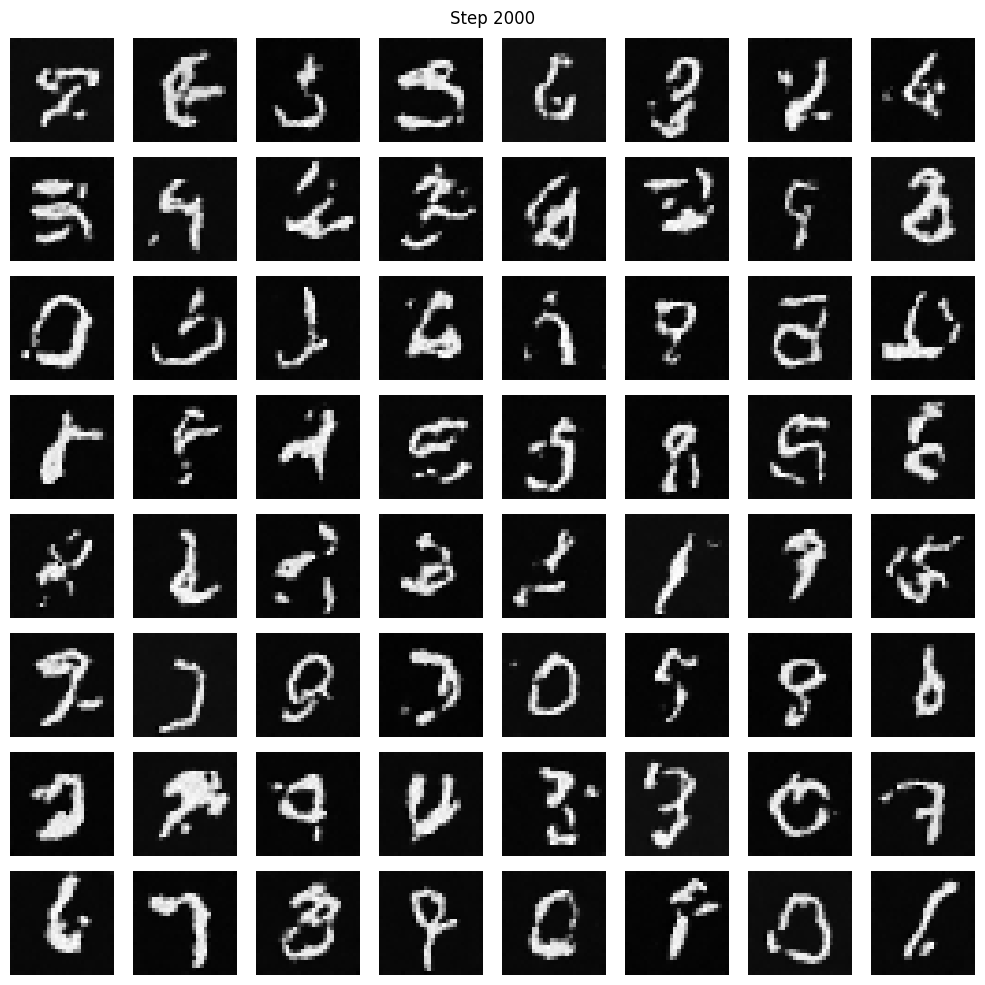

Training:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 3001/6000 [01:21<01:11, 41.72step/s, loss=0.24345309]

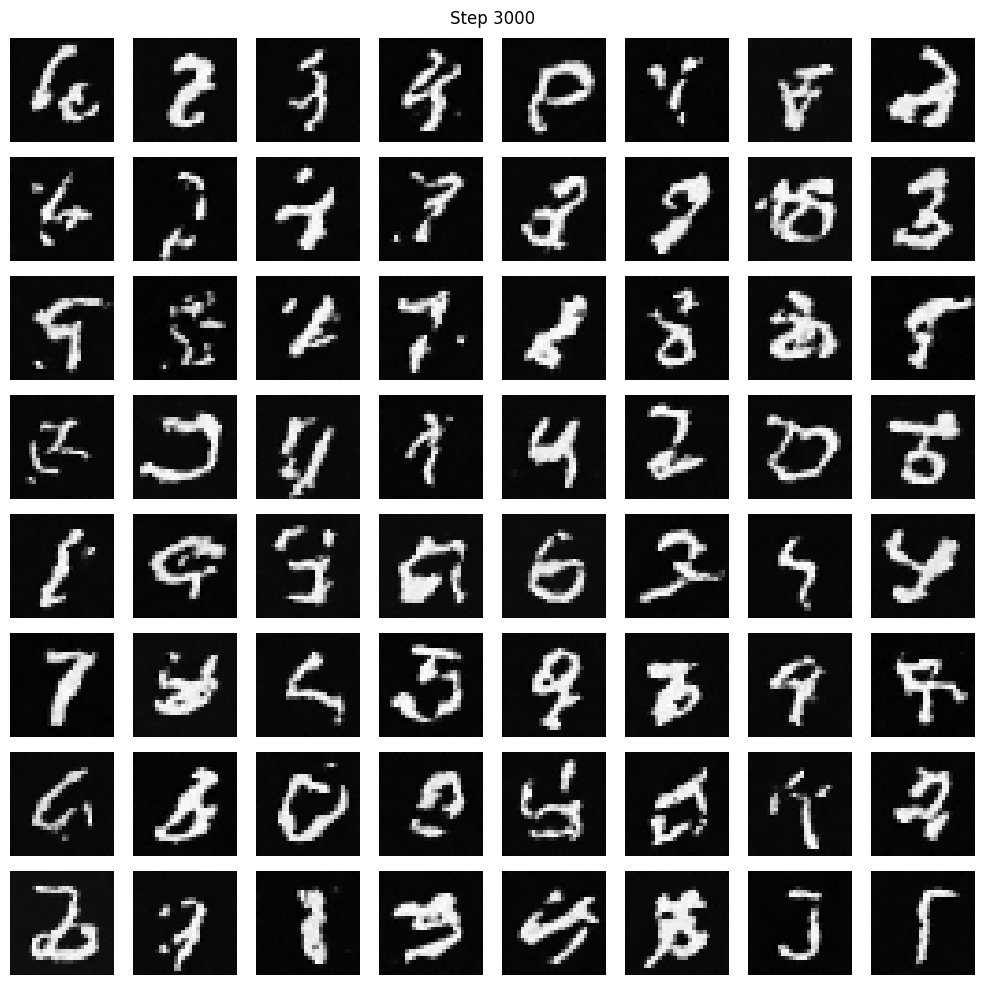

Training:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 4000/6000 [01:46<00:45, 44.17step/s, loss=0.19435303]

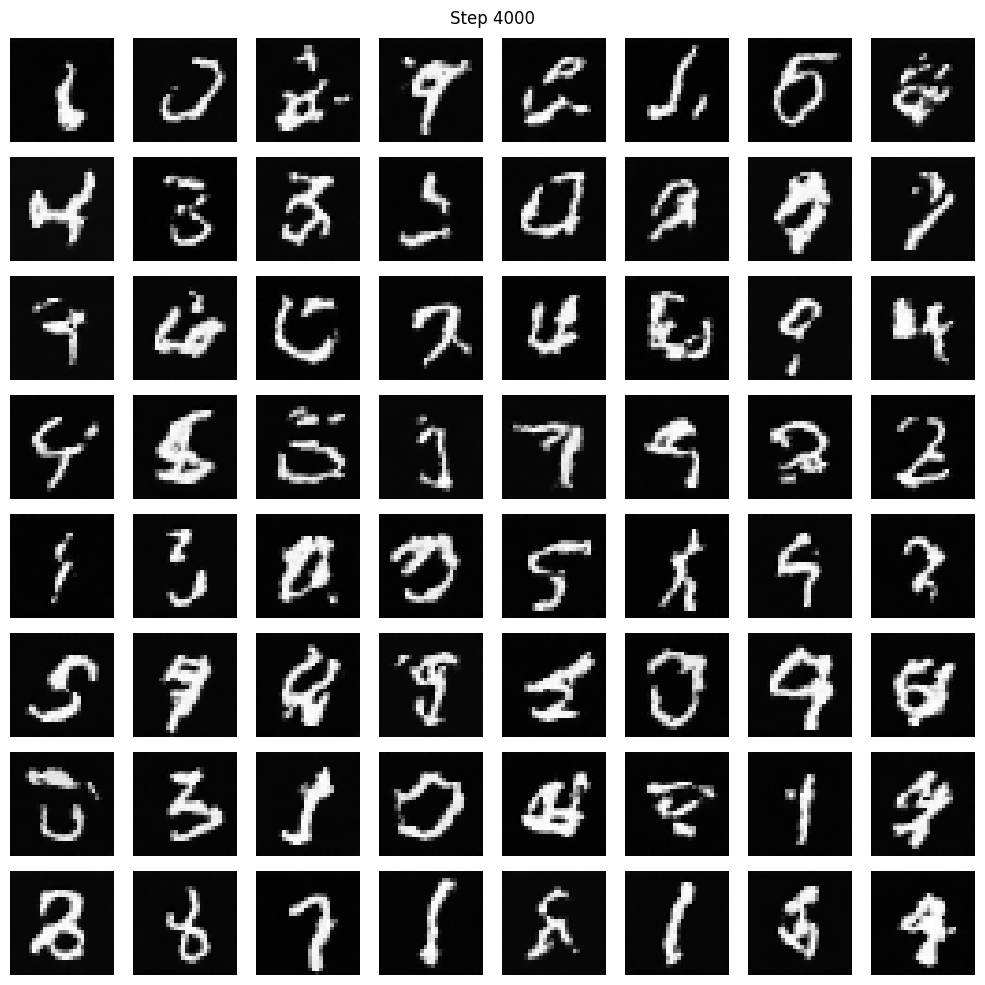

Training:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 5000/6000 [02:11<00:47, 21.23step/s, loss=0.20397696]

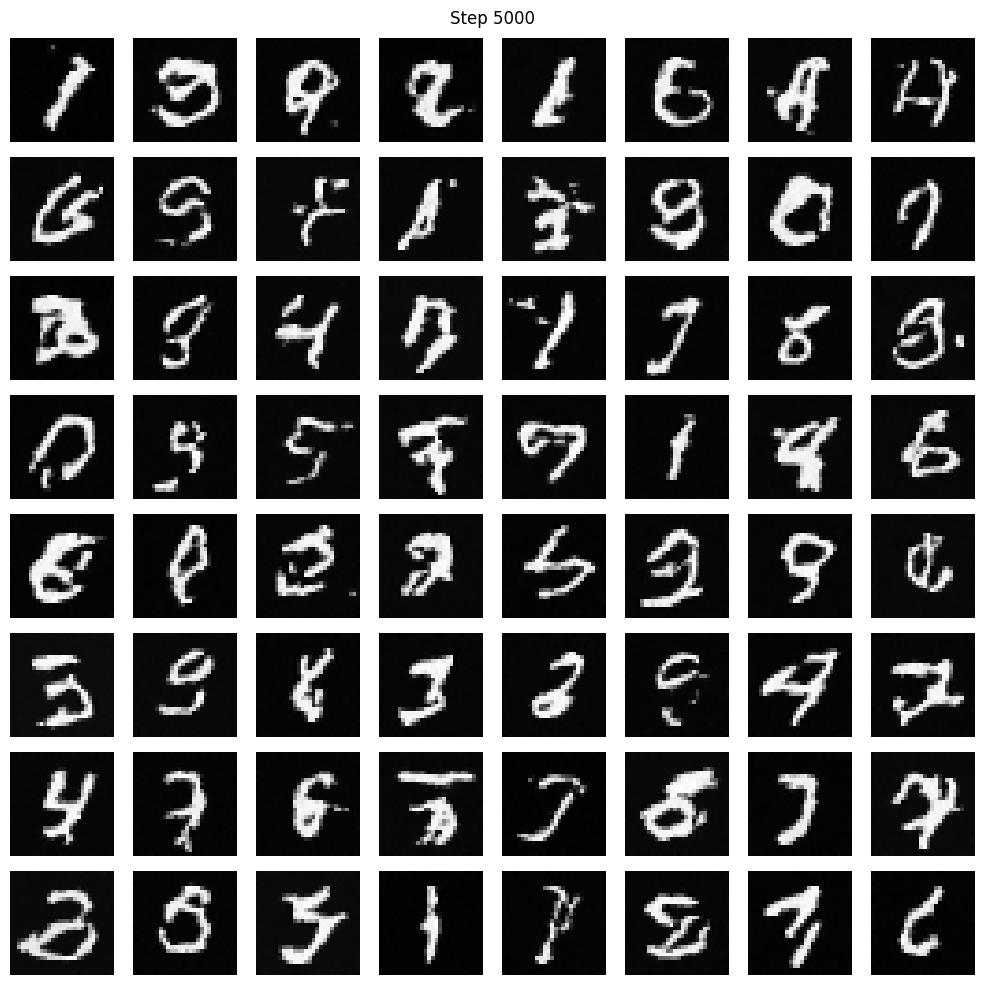

Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6000/6000 [02:36<00:00, 38.29step/s, loss=0.1918967] 


In [ ]:

num_steps = 6_000
cnn_train_loss = []
with tqdm(total=num_steps, desc='Training', unit='step') as pbar:
    for step in range(num_steps):
        key, subkey1, subkey2 = jax.random.split(key, 3)
        try:
            images, labels = next(train_loader)
        except StopIteration:
            train_loader = iter(train_dataloader)
            images, labels = next(train_loader)
        images, labels = jnp.array(images), jnp.array(labels)
        t_batch = jax.random.uniform(subkey1, (len(images),))
        x0 = jax.random.normal(subkey2, images.shape)
        params, opt_state, loss = train_step(params, opt_state, x0, images, t_batch, velocity_model, optimizer)
        cnn_train_loss.append(loss)
        pbar.set_postfix(loss=loss)
        pbar.update(1)
        if step % 1_000 == 0:
            x1 = sample(params, velocity_model, x0[:64], dt=0.01)
            plot_image_grid(x1, suptitle=f'Step {step}')

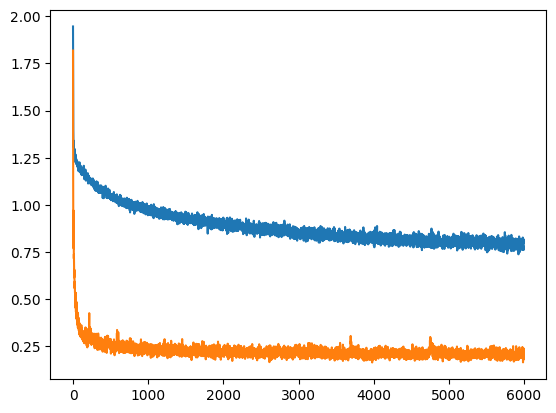

In [ ]:
# Let's compare the two training losses

plt.plot(fcn_train_loss)
plt.plot(cnn_train_loss)

Looks much better now :) You could experiment with how to make it even better by varying the different hyperparameters. An additional fun exercise would be to try your classifier from exercise 1 on predicting the number for the generated samples to make sure that we are generating a uniform distribution of numbers, and it is not just generating mostly 0's for example. And finally, you could have some fun turning this model into a conditional one. How would you tell the model that you want to generate a particular number? Like 2's or 8's?